In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib

In [2]:
data1 = np.load('./crossvalidation_files/histogram_data/corr_histogram_split_1.npz')

In [3]:
for f in data1.files:
    print(f)

n_corr
bins_corr


In [9]:
hist_directories = os.listdir('./crossvalidation_files/histogram_data/')
print(hist_directories)

['corr_histogram_split_1.npz', 'corr_histogram_split_2.npz', 'corr_histogram_split_3.npz', 'corr_histogram_split_4.npz', 'corr_histogram_split_5.npz', 'neg_histogram_split_1.npz', 'neg_histogram_split_2.npz', 'neg_histogram_split_3.npz', 'neg_histogram_split_4.npz', 'neg_histogram_split_5.npz']


11 11
11 11
11 11
11 11
11 11


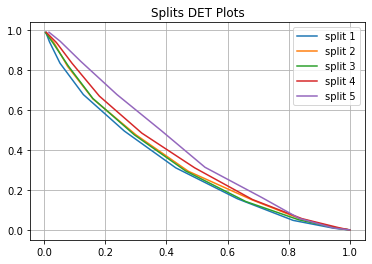

In [30]:
for it in range(5):
    data_corr = np.load('./crossvalidation_files/histogram_data/'+hist_directories[it])
    data_neg = np.load('./crossvalidation_files/histogram_data/'+hist_directories[it+5])
    n_corr, bins_corr = [data_corr[f] for f in data_corr.files]
    n_neg, bins_neg = [data_neg[f] for f in data_neg.files]
    
#     plt.bar(bins_neg[1:], n_neg)
#     plt.bar(bins_corr[1:], n_corr)
#     plt.show()
    print(len(bins_corr), len(bins_neg))
    corr_integral, neg_integral = integrate_histograms(n_corr, n_neg)
#     field = np.linspace(-1, 1, 10)
#     plt.plot(field, corr_integral)
#     plt.plot(field, neg_integral)
    DETCurve(corr_integral, neg_integral)

    
plt.title('Splits DET Plots')
plt.legend(['split 1', 'split 2', 'split 3', 'split 4', 'split 5'])
plt.grid()
plt.show()
    

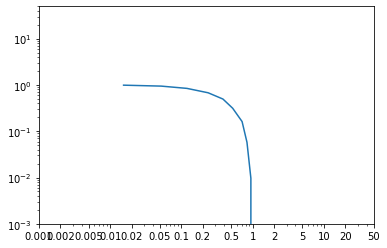

In [21]:
DETCurve(corr_integral, neg_integral)

In [34]:
print(bins_corr)
print(bins_neg)

[-0.90556853 -0.71873694 -0.53190535 -0.34507375 -0.15824216  0.02858943
  0.21542102  0.40225261  0.5890842   0.77591579  0.96274738]
[-0.91913741 -0.73317051 -0.54720361 -0.36123671 -0.17526981  0.01069709
  0.19666399  0.38263089  0.5685978   0.7545647   0.9405316 ]


In [29]:
from matplotlib import pyplot as plt
def DETCurve(fps,fns):
    """
    Given false positive and false negative rates, produce a DET Curve.
    The false positive rate is assumed to be increasing while the false
    negative rate is assumed to be decreasing.
    """
    axis_min = min(fps[0],fns[-1])
#     fig,ax = plt.subplots()
    plt.plot(fps,fns)
#     plt.yscale('log')
#     plt.xscale('log')
#     ticks_to_use = [0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,2,5,10,20,50]
#     ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#     ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
#     ax.set_xticks(ticks_to_use)
#     ax.set_yticks(ticks_to_use)
#     plt.xticks(ticks_to_use, ticks_to_use)
#     plt.yticks(ticks_to_use, ticks_to_use)
#     plt.axis([0.001,50,0.001,50])

In [5]:
def integrate_histograms(n_corr, n_neg):
    corr_integral, neg_integral = [], []
    corr_sum, neg_sum = 0, 0
    for n_corr, n_neg in zip(n_corr, n_neg):
        corr_sum += n_corr
        neg_sum += n_neg
        corr_integral.append(corr_sum)
        neg_integral.append(neg_sum)
        
    corr_integral = corr_integral / max(corr_integral)
    neg_integral = 1 - (neg_integral / max(neg_integral))
    
    return corr_integral, neg_integral